#**Menampilkan Visualisasi Data Pelanggan Lazada Indonesia**

Tujuan praktikum ini untuk menampilkan data pelanggan Lazada Indonesia dengan menggunakan DataFrame Pandas.

- Sumber Dataset : https://www.kaggle.com/grikomsn/lazada-indonesian-reviews

##**1. Data Exploration**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Mounted at Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#melakukan eksplorasi dataset
df = pd.read_csv('/content/drive/MyDrive/Machine Learning/dataset/20191002-reviews.csv')

In [ ]:
#melihat tipe data pada setiap kolom yang ada di dataset
df.dtypes

itemId              int64
category           object
name               object
rating              int64
originalRating    float64
reviewTitle        object
reviewContent      object
likeCount           int64
upVotes             int64
downVotes           int64
helpful              bool
relevanceScore    float64
boughtDate         object
clientType         object
retrievedDate      object
dtype: object

In [ ]:
#menampilkan jumlah baris dan kolom pada dataset
df.shape

(203787, 15)

In [ ]:
#menampilkan 5 baris teratas yang terdapat pada dataset
df.head()

,itemId,category,name,rating,originalRating,reviewTitle,reviewContent,likeCount,upVotes,downVotes,helpful,relevanceScore,boughtDate,clientType,retrievedDate
0,100002528,beli-harddisk-eksternal,Kamal U.,5,NaN,NaN,bagus mantap dah sesui pesanan,0,0,0,True,26.51,09 Apr 2019,androidApp,2019-10-02
1,100002528,beli-harddisk-eksternal,yofanca m.,4,NaN,NaN,"Bagus, sesuai foto",0,0,0,True,22.49,24 Sep 2017,androidApp,2019-10-02
2,100002528,beli-harddisk-eksternal,Lazada Customer,5,NaN,ok mantaaapppp barang sesuai pesanan.. good,okkkkk mantaaaaaaapppp ... goood,0,0,0,True,21.50,04 Apr 2018,androidApp,2019-10-02
3,100002528,beli-harddisk-eksternal,Lazada Customer,4,NaN,NaN,bagus sesuai,0,0,0,True,20.51,22 Sep 2017,androidApp,2019-10-02
4,100002528,beli-harddisk-eksternal,Yosep M.,5,NaN,NaN,NaN,0,0,0,True,16.01,17 Agu 2018,androidApp,2019-10-02


Disini, dapat kita lihat bahwa terdapat **203.787** baris dan **15** kolom yang terdapat pada dataset. 
Pada kesempatan kali ini, kita akan menampilkan visualisasi data berupa hubungan antara **rating** dan **relevance score** yang diberikan oleh pelanggan Lazada untuk **kategori produk** tertentu, serta mencari tahu bagaimana jenis perangkat seluler yang digunakan oleh pelanggan Lazada untuk melakukan transaksi pembelian.

##**2. Data Cleaning**


- remove unwanted columns

In [ ]:
#menampilkan nama kolom yang ada pada dataset
df.columns

Index(['itemId', 'category', 'name', 'rating', 'originalRating', 'reviewTitle',
       'reviewContent', 'likeCount', 'upVotes', 'downVotes', 'helpful',
       'relevanceScore', 'boughtDate', 'clientType', 'retrievedDate'],
      dtype='object')

In [ ]:
#menghilangkan kolom yang tidak dibutuhkan
df.drop(['itemId', 'name', 'reviewContent', 'originalRating', 'reviewTitle', 'likeCount', 'upVotes', 'downVotes', 'helpful', 'boughtDate', 'retrievedDate'],axis=1,inplace=True) #do not execute two times

In [ ]:
#menampilkan kolom yang dibutuhkan
df.head()

,category,rating,relevanceScore,clientType
0,beli-harddisk-eksternal,5,26.51,androidApp
1,beli-harddisk-eksternal,4,22.49,androidApp
2,beli-harddisk-eksternal,5,21.50,androidApp
3,beli-harddisk-eksternal,4,20.51,androidApp
4,beli-harddisk-eksternal,5,16.01,androidApp


- handle duplicate entries

In [ ]:
#mengecek duplikat entries
df.duplicated().sum()

177940

In [ ]:
#menghilangkan data yang teridentifikasi duplikat entries
df = df.drop_duplicates()

In [ ]:
#double check duplikat entries
df.duplicated().sum()

0

- handle missing values

In [ ]:
#check for missing values
df.isnull().sum()

category          0
rating            0
relevanceScore    0
clientType        0
dtype: int64

- Handle unnatural values

In [ ]:
#check the minimum value
df.min()

category          beli-harddisk-eksternal
rating                                  1
relevanceScore                       0.96
clientType                     androidApp
dtype: object

In [ ]:
#check the maximum value
df.max()

category          shop-televisi-digital
rating                                5
relevanceScore                     76.5
clientType                   mobile-app
dtype: object

In [ ]:
df.skew()

rating           -0.897521
relevanceScore    0.603911
dtype: float64

In [ ]:
df

,category,rating,relevanceScore,clientType
0,beli-harddisk-eksternal,5,26.51,androidApp
1,beli-harddisk-eksternal,4,22.49,androidApp
2,beli-harddisk-eksternal,5,21.50,androidApp
3,beli-harddisk-eksternal,4,20.51,androidApp
4,beli-harddisk-eksternal,5,16.01,androidApp
...,...,...,...,...
203772,shop-televisi-digital,4,21.29,desktop
203776,shop-televisi-digital,1,14.79,androidApp
203779,shop-televisi-digital,1,10.35,mobile-app
203782,shop-televisi-digital,5,24.63,desktop


Setelah melakukan pengolahan data cleaning, dataset menjadi terdiri atas **25.847** baris dan **4** kolom.

##**3. Exploratory Analytics**


###**Use Data Visualization**

#### **1. Univariate Analysis**

Pada bagian ini, analisis univariate digunakan untuk menampilkan banyaknya jumlah data yang terpadat pada setiap kolom.

In [ ]:
df.columns

Index(['category', 'rating', 'relevanceScore', 'clientType'], dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


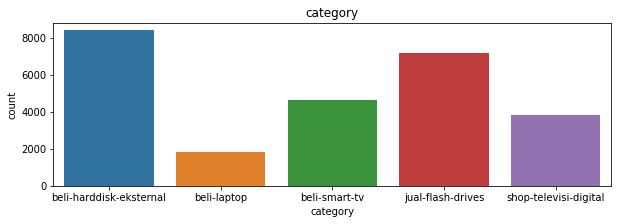

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


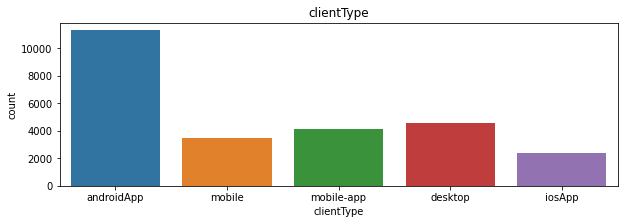

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


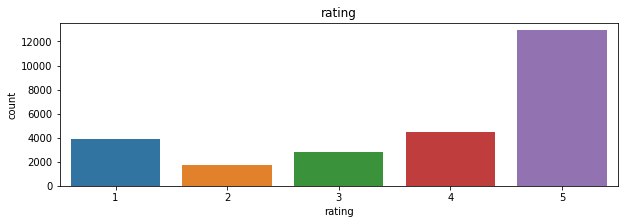

In [ ]:
cat = ['category', 'clientType', 'rating']

for col in cat:
  plt.figure(figsize=(10,3))
  sns.countplot(df[col])
  plt.title(col)
  plt.show()

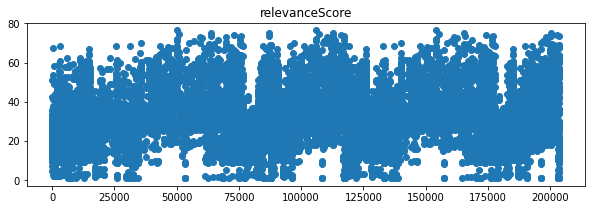

In [ ]:
cat = ['relevanceScore']

for col in cat:
  plt.figure(figsize=(10,3))
  plt.scatter(df.index,df[col])
  plt.title(col)
  plt.show()

**Analisa :**
1. Lebih dari 8.000 pelanggan Lazada telah melakukan pembelian untuk kategori produk Hardisk Eksternal. 
2. Lebih dari 10.000 pelanggan Lazada melakukan transaksi di Android.
3. Lebih dari 12.000 pelanggan Lazada memberikan rating 5 untuk produk yang telah mereka beli.
4. Pelanggan Lazada cenderung puas terhadap produk yang mereka beli dengan jangkauan skor relevansi 30 - 40.

**Hipotesis :** 
1. Apakah kategori produk Hardisk Eksternal berpengaruh besar terhadap perolehan rating yang bagus untuk produk yang terjual?
2. Apakah pelanggan Lazada yang menggunakan perangkat seluler Android berpengaruh besar terhadap perolehan rating yang bagus untuk produk yang terjual?
3. Apakah skor relevansi berpengaruh terhadap perolehan rating yang bagus untuk produk yang terjual?

#### **2. Bivariate Analysis**

Pada bagian ini, analisis bivariate digunakan untuk melakukan perbandingan antara setiap kolom *categorical* dengan kolom yang bersifat *numerical*.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


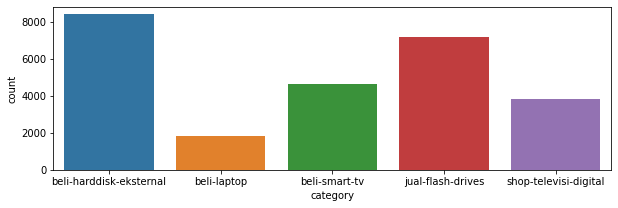

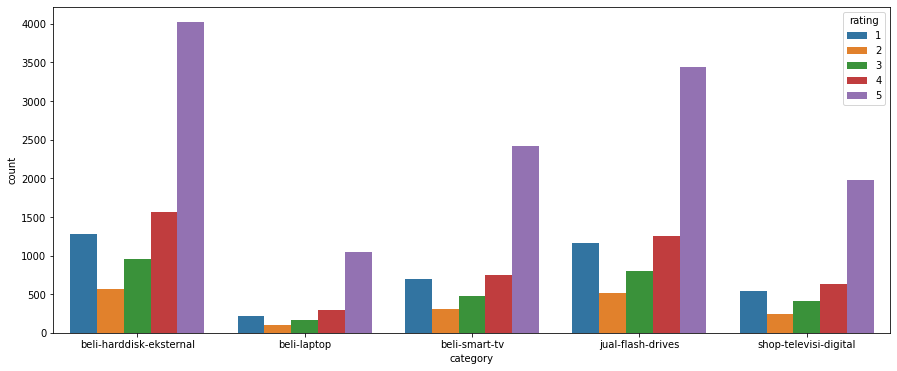

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(df["category"])
plt.show()
plt.figure(figsize=(15,6))
sns.countplot(x=df["category"], hue=df["rating"], data=pd.melt(df))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


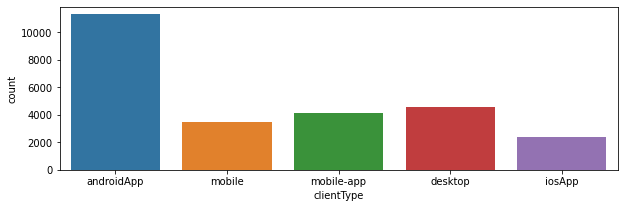

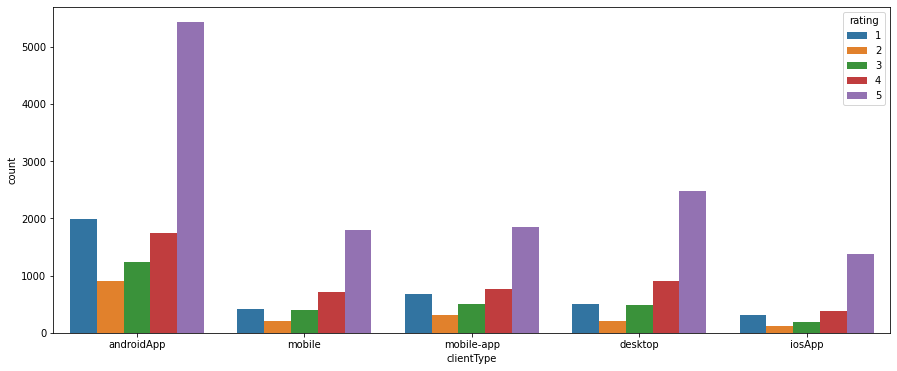

In [ ]:
plt.figure(figsize=(10,3))
sns.countplot(df["clientType"])
plt.show()
plt.figure(figsize=(15,6))
sns.countplot(x=df["clientType"], hue=df["rating"], data=pd.melt(df))
plt.show()

**Analisa :**
1. Hampir 4.000 lebih pelanggan Lazada memberikan rating 5 untuk kategori produk Hardisk Eksternal.
2. Lebih dari 5.000 pelanggan Lazada yang menggunakan perangkat seluler Android memberikan rating 5 untuk setiap produk yang telah dibelinya.
3. Rata - rata setiap kategori produk memperoleh rating bagus untuk produk yang terjual.
4. Rata - rata pelanggan yang bertransaksi dengan berbagai perangkat seluler memberikan rating bagus untuk produk yang mereka beli.


**3. Multivariate Analysis**

Pada bagian ini, analisa multivariate digunakan untuk menampilkan visualisasi perbandingan beberapa kolom yang memiliki korelasi paling kuat.

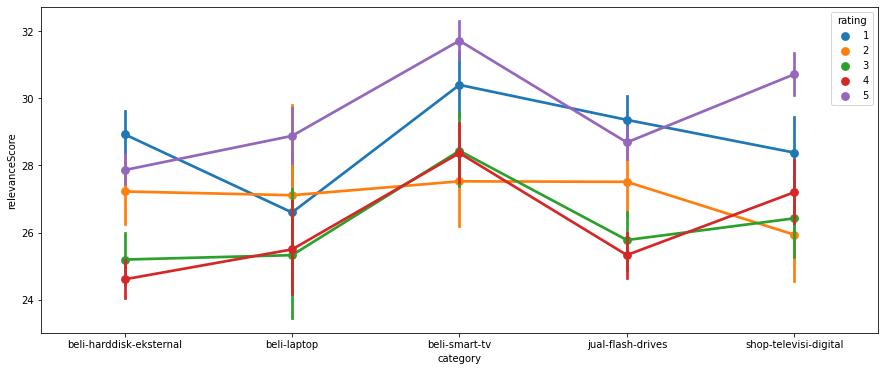

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="category", y="relevanceScore", hue="rating", data=df)
plt.show()

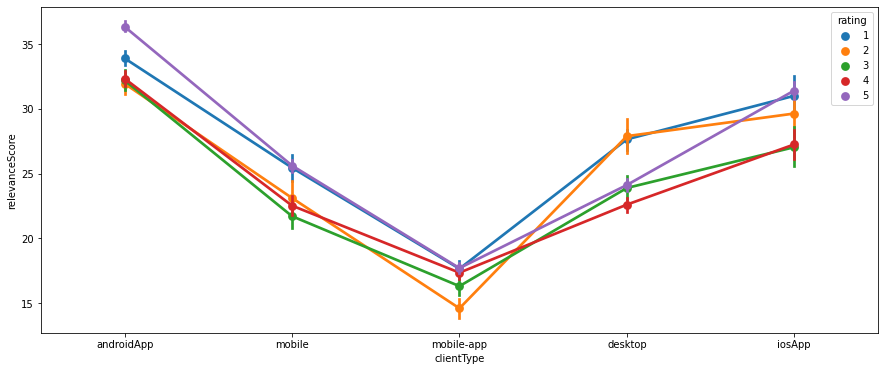

In [ ]:
plt.figure(figsize=(15,6))
sns.pointplot(x="clientType", y="relevanceScore", hue="rating", data=df)
plt.show()

##**Conclusion**


- Pelanggan yang melakukan transaksi pembelian pada kategori produk Laptop, Smart TV, dan TV Digital, cenderung memberikan rating bagus serta puas terhadap kualitas produk yang telah dibelinya.
- Meskipun transaksi pembelian terjadi diberbagai perangkat seluler, namun sebagian besar transaksi yang dilakukan oleh pelanggan Lazada memberikan rating tinggi serta mempunyai angka relevansi yang tinggi terhadap produk yang telah dibelinya.